In [2]:
# Import sys, then tell python where to find the nEXO-specific classes
# I'll assume you're in the sensitivity/work directory, as shown here by !pwd

import sys
!pwd
sys.path.append('../../../modules')

/g/g20/lenardo1/nEXO/sensitivity/work/SensitivityPaper2020_scripts/PaperPlots


In [3]:
# Import useful libraries for analysis

import pandas as pd
import histlite as hl
import numpy as np
from matplotlib import pyplot as plt
import os
from cycler import cycler
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

import matplotlib
from matplotlib.backends.backend_pdf import PdfPages

plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = (10,8)

In [4]:
# Import the nEXO sensitivity classes

plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = (10,8)

import nEXOFitWorkspace
import nEXOFitModel
import nEXOFitLikelihood
import nEXOMaterialsDBInterface

import importlib
importlib.reload( nEXOMaterialsDBInterface )
importlib.reload( nEXOFitWorkspace )
importlib.reload( nEXOFitModel )

<module 'nEXOFitModel' from '../../../modules/nEXOFitModel.py'>

In [5]:
optimized_binning_yaml = '../../config/Sensitivity2020_Optimized_DNN_Standoff_Binning_version1.yaml'
workspace2020_d024 = nEXOFitWorkspace.nEXOFitWorkspace(config=optimized_binning_yaml)
workspace2020_d024_ind = nEXOFitWorkspace.nEXOFitWorkspace(config=optimized_binning_yaml)

optimized_binning_components_table = '/p/vast1/nexo/sensitivity2020/pdfs/component_tables/ComponentsTable_D-024_merged-v11_Optimized_DNN_Standoff_Binning_version1.h5'
workspace2020_d024.LoadComponentsTableFromFile(optimized_binning_components_table)
workspace2020_d024_ind.LoadComponentsTableFromFile(optimized_binning_components_table)




Loading input data froma previously-generated components table....

Loaded dataframe with 138 components.
Contains the following quantities of interest:
	PDFName
	Component
	Isotope
	Material
	Radioassay ID
	MC ID
	Total Mass or Area
	Activity ID
	SpecActiv
	SpecActivErr
	SpecActivErrorType
	RawActiv
	RawActivErr
	TotalHitEff_N
	Histogram
	HistogramAxisNames
	TotalHitEff_K
	Group
	Expected Counts

Fit variables:
	['DNN', 'Energy (keV)', 'Standoff (mm)']

Loading input data froma previously-generated components table....

Loaded dataframe with 138 components.
Contains the following quantities of interest:
	PDFName
	Component
	Isotope
	Material
	Radioassay ID
	MC ID
	Total Mass or Area
	Activity ID
	SpecActiv
	SpecActivErr
	SpecActivErrorType
	RawActiv
	RawActivErr
	TotalHitEff_N
	Histogram
	HistogramAxisNames
	TotalHitEff_K
	Group
	Expected Counts

Fit variables:
	['DNN', 'Energy (keV)', 'Standoff (mm)']


In [6]:
#Create the PDFs for the standard model
workspace2020_d024.CreateGroupedPDFs()
model2020_d024 = nEXOFitModel.nEXOFitModel()
model2020_d024.AddPDFsFromDataframe(workspace2020_d024.df_group_pdfs,\
                               workspace2020_d024.histogram_axis_names)
model2020_d024.GenerateModelDistribution()


Creating grouped PDFs....
no sigma for Rn222_HFE (R-053.9.1.1)
no sigma for Rn222_FieldRingsRadon (R-088.4.1.1)
no sigma for Rn222_CathodeRadon (R-088.1.1.1)
no sigma for Rn222_ActiveLXe (R-088.2.1.1)
no sigma for Ar42_ActiveLXe (R-088.2.1.1)
no sigma for Rn222_InactiveLXe (R-088.3.1.1)
no sigma for Ar42_InactiveLXe (R-088.3.1.1)

ERROR: No histogram available for K40_OuterCryostatWTSupport

ERROR: No histogram available for Co60_OuterCryostatWTSupport
	Group:                              	Expected Counts:
	Far                                 	      5092.6943
	Vessel_U238                         	      1855.2036
	Vessel_Th232                        	       577.5951
	Internals_U238                      	      4913.1760
	Internals_Th232                     	      2458.2828
	Rn222                               	     20412.3268
	FullTPC_K40                         	  40640299.4767
	B8nu                                	        12.9327
	FullLXeBb2n                         	  14755516.1739
	

Hist(14 bins in [0.0,1.0], 250 bins in [1000.0,3500.0], 22 bins in [0.0,650.0], with sum 55431159.894140035, 7571 empty bins, and 0 non-finite values)

In [7]:
roi_cut_dict_2020_d024 = {'DNN': (0.86,1.),
                    'Energy (keV)': (2434., 2480.),
                    'Standoff (mm)': (104.5, 650.)
                    }

workspace2020_d024.DefineROI( roi_cut_dict_2020_d024 )

DNN:
	Input ROI boundaries:      0.86,      1.0
	Actual ROI boundaries:     0.86,      1.0
Energy (keV):
	Input ROI boundaries:    2434.0,   2480.0
	Actual ROI boundaries:   2430.0,   2480.0
Standoff (mm):
	Input ROI boundaries:     104.5,    650.0
	Actual ROI boundaries:    100.0,    650.0


In [8]:
likelihood2020 = nEXOFitLikelihood.nEXOFitLikelihood()
likelihood2020.AddPDFDataframeToModel(workspace2020_d024.df_group_pdfs,\
                                      axis_names=workspace2020_d024.histogram_axis_names)

sig_idx = likelihood2020.model.GetVariableIndexByName('Bb0n')
likelihood2020.model.variable_list[sig_idx]['Value'] = 11.81


likelihood2020.AddDataset( likelihood2020.model.GenerateDataset() )

likelihood2020.PrintVariableList()


Variable name:          Value:       IsFixed:  FitError   InputError:   IsConstrained: Limits:      
Num_Far                 5.093e+03    False     None       71.36         False          (None,None)
Num_Vessel_U238         1.855e+03    False     None       43.07         False          (None,None)
Num_Vessel_Th232        577.6        False     None       24.03         False          (None,None)
Num_Internals_U238      4.913e+03    False     None       70.09         False          (None,None)
Num_Internals_Th232     2.458e+03    False     None       49.58         False          (None,None)
Num_Rn222               2.041e+04    False     None       142.9         False          (None,None)
Num_FullTPC_K40         4.064e+07    False     None       6.375e+03     False          (None,None)
Num_B8nu                12.93        False     None       3.596         False          (None,None)
Num_FullLXeBb2n         1.476e+07    False     None       3.841e+03     False          (None,None)
Num_Full

In [9]:
# Set up the plotting parameters
initial_cycler = plt.rcParams['axes.prop_cycle']
plt.rcParams.update({'font.size': 14})
custom_cycler = cycler( color = [ (1.,0.5,0.),\
                                 (0.,0.,1.,0.5),\
                                 (0.,0.8,0.),\
                                 (1.,0.,0.),\
                                 (0.5,1.,0.5),\
                                 (0.,0.8,0.8),\
                                 (0.1,0.6,0.5),\
                                 (1.,0.,1.),\
                                 (0.5,0.,0.5) ] ) 
plt.rc('axes', prop_cycle=custom_cycler)


labels_dict = {"Far": "Far components",
"VesselU238": r'$^{238}$U TPC Vessel',
"VesselTh232": r'$^{232}$Th TPC Vessel',
"InternalsU238": r'$^{238}$U Internals',
"InternalsTh232": r'$^{232}$Th Internals',
"Rn222": r'Internal $^{222}$Rn',
"FullTPCK40": r'$^{40}$K (all)',
"B8nu": r'Solar $\nu$',
"FullLXeBb2n": r'$^{136}$Xe $2\nu\beta\beta$',
"FullLXeBb0n": r'$^{136}$Xe $0\nu\beta\beta$',
"Xe137andAr42": r'$^{137}$Xe and $^{42}$Ar'}


colors_dict = {"Far": (1.,0.5,0.),
"VesselU238": (0.6,0.2,0.3),
"VesselTh232": (0.,0.8,0.),
"InternalsU238": (1.,0.,0.),
"InternalsTh232": (0.5,1.,0.5),
"Rn222": (0.,0.8,0.8),
"FullTPCK40": (0.8,0.7,0.),
"B8nu": (0.5,0.,0.5),
"FullLXeBb2n": (0.7,0.7,0.7),
"FullLXeBb0n": (0.1,0.1,1.0),
"Xe137andAr42": (1.,0.,1.)}

categories_dict = {"Far": 'External',
"VesselU238": 'External',
"VesselTh232": 'External',
"InternalsU238": 'External',
"InternalsTh232": 'External',
"Rn222": 'External',
"FullTPCK40": 'External',
"B8nu": 'Internal',
"FullLXeBb2n": 'Bb2n',
"FullLXeBb0n": 'Bb0n',
"Xe137andAr42": 'Internal'}


from scipy.interpolate import interp1d

def fiducial_mass( standoff ):
    
    rho = 0.003057/1.e6 # g/cm3
    rfsr = 71.85 # mm
    dtpc = 1277 # mm
    zdrift = 1183 # mm
    
    return rho * ( np.pi * (dtpc/2 - rfsr - standoff)**2 * (zdrift - 2*standoff) )

standoffs = np.linspace(0.,650.,100000)
masses = fiducial_mass(standoffs)*1000.

standoff_vs_mass = interp1d(masses,standoffs)





Plotting Far
Plotting VesselU238
Plotting VesselTh232
Plotting InternalsU238
Plotting InternalsTh232
Plotting Rn222
Plotting FullTPCK40
Plotting B8nu
Plotting FullLXeBb2n
Plotting FullLXeBb0n
Plotting Xe137andAr42
Plotting data...
DNN:
	Input cut boundaries:       0.0,      1.0
	Actual ROI boundaries:      0.0,      1.0
Energy (keV):
	Input cut boundaries:    1000.0,   3500.0
	Actual ROI boundaries:   1000.0,   3500.0
Standoff (mm):
	Input cut boundaries:       0.0,    650.0
	Actual ROI boundaries:      0.0,    650.0
Plotting Far
Plotting VesselU238
Plotting VesselTh232
Plotting InternalsU238
Plotting InternalsTh232
Plotting Rn222
Plotting FullTPCK40
Plotting B8nu
Plotting FullLXeBb2n
Plotting FullLXeBb0n
Plotting Xe137andAr42
Plotting data...
DNN:
	Input cut boundaries:       0.0,      1.0
	Actual ROI boundaries:      0.0,      1.0
Energy (keV):
	Input cut boundaries:    1000.0,   3500.0
	Actual ROI boundaries:   1000.0,   3500.0
Standoff (mm):
	Input cut boundaries:       0.0,    650

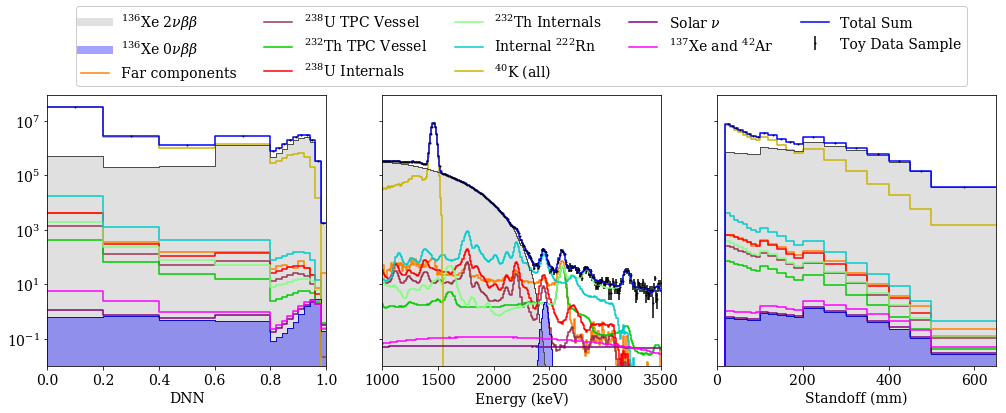

In [10]:
cut_dict = {'DNN': (0.,1.),
                    'Energy (keV)': (1000.,3500.),
                    'Standoff (mm)': (0., 650.)
                    }


plot_data=True
show_legend=True

plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots (1, 3, figsize=(17, 5), gridspec_kw={'wspace':0.2},sharey=True)


# Loop over pdfs and each to plot
for j in range(3):
    for i in range(len(likelihood2020.model.variable_list)):
        var = likelihood2020.model.variable_list[i]
        if 'Num' in var['Name']:

            weight = var['Value']
            cut_pdf = likelihood2020.model.GetSlicedDistribution( cut_dict, var_name=var['Name'], verbose=False )
            component_name = ''.join( var['Name'].split('_')[1:] )
            print('Plotting {}'.format(component_name))


            if i == 0:
             # Initialize the summed histograms      
             cut_sum = hl.hist( [np.array([0.]),np.array([0.]),np.array([0.])] , \
                               bins=cut_pdf.bins)
            #else:
            cut_sum += ( weight * cut_pdf )

            #print('Component name: {}'.format(component_name))
            if 'Bb2n' in component_name:
                hl.fill_between( ax[j], 0, (weight * cut_pdf).project([j]), \
                                label=labels_dict[component_name], color=(0.7,0.7,0.7), alpha=0.4 )
                hl.plot1d( ax[j], (weight * cut_pdf).project([j]), \
                           color=(0.3,0.3,0.3), linewidth=1 )
            elif 'Bb0n' in component_name:
                hl.fill_between( ax[j], 0, (weight * cut_pdf).project([j]), \
                                label=labels_dict[component_name], color=(0.1,0.1,1.0), alpha=0.4 )
                hl.plot1d( ax[j], (weight * cut_pdf).project([j]), \
                          color=(0.05,0.05,0.8), linewidth=1 )
            else:
                hl.plot1d( ax[j], (weight * cut_pdf).project([j]), \
                          label=labels_dict[component_name], color=colors_dict[component_name] )
                
    hl.plot1d(ax[j],cut_sum.project([j]),color='b',label='Total Sum')
                
    if plot_data:
        print('Plotting data...')
        cut_data = likelihood2020.GetSlicedDataset( cut_dict, verbose=True )

        cut_data_1d = cut_data.project([j])
        bin_centers = (cut_data_1d.bins[0][:-1]+cut_data_1d.bins[0][1:])/2.
        ax[j].errorbar(bin_centers,cut_data_1d.values,yerr=np.sqrt(cut_data_1d.values),\
                                                  fmt='ok',markersize=1,label='Toy Data Sample')
                
    ax[j].set_yscale('log')
    ax[j].set_xlim((cut_pdf.project([j])).bins[0][0],(cut_pdf.project([j])).bins[0][-1])
    ax[j].set_xlabel('{}'.format(likelihood2020.model.axis_names[j]))
    
ax[1].set_zorder(100)
if show_legend:
    ax[1].legend(ncol=5,facecolor=(1.,1.,1.),framealpha=1.,\
                 loc='upper center',fontsize=14,bbox_to_anchor=(0.5,1.35))
            
plt.savefig('all_three_event_distributions_projected.png',dpi=300,bbox_inches='tight')
            
            


Plotting Far
Plotting VesselU238
Plotting VesselTh232
Plotting InternalsU238
Plotting InternalsTh232
Plotting Rn222
Plotting FullTPCK40
Plotting B8nu
Plotting FullLXeBb2n
Plotting FullLXeBb0n
Plotting Xe137andAr42
Plotting data...
DNN:
	Input cut boundaries:       0.0,      1.0
	Actual ROI boundaries:      0.0,      1.0
Energy (keV):
	Input cut boundaries:    1000.0,   3500.0
	Actual ROI boundaries:   1000.0,   3500.0
Standoff (mm):
	Input cut boundaries:       0.0,    650.0
	Actual ROI boundaries:      0.0,    650.0
Plotting Far
Plotting VesselU238
Plotting VesselTh232
Plotting InternalsU238
Plotting InternalsTh232
Plotting Rn222
Plotting FullTPCK40
Plotting B8nu
Plotting FullLXeBb2n
Plotting FullLXeBb0n
Plotting Xe137andAr42
Plotting data...
DNN:
	Input cut boundaries:       0.0,      1.0
	Actual ROI boundaries:      0.0,      1.0
Energy (keV):
	Input cut boundaries:    1000.0,   3500.0
	Actual ROI boundaries:   1000.0,   3500.0
Standoff (mm):
	Input cut boundaries:       0.0,    650

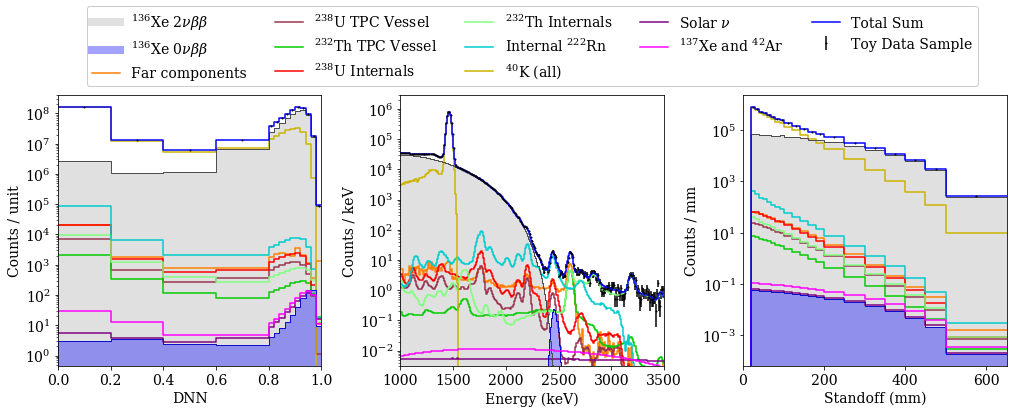

In [11]:
# Plot differential spectra

cut_dict = {'DNN': (0.,1.),
                    'Energy (keV)': (1000.,3500.),
                    'Standoff (mm)': (0., 650.)
                    }


plot_data=True
show_legend=True

plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots (1, 3, figsize=(17, 5), gridspec_kw={'wspace':0.3})


# Loop over pdfs and each to plot
for j in range(3):
    for i in range(len(likelihood2020.model.variable_list)):
        var = likelihood2020.model.variable_list[i]
        if 'Num' in var['Name']:

            weight = var['Value']
            cut_pdf = likelihood2020.model.GetSlicedDistribution( cut_dict, var_name=var['Name'], verbose=False )
            component_name = ''.join( var['Name'].split('_')[1:] )
            print('Plotting {}'.format(component_name))


            if i == 0:
             # Initialize the summed histograms      
             cut_sum = hl.hist( [np.array([0.]),np.array([0.]),np.array([0.])] , \
                               bins=cut_pdf.bins)
            #else:
            cut_sum += ( weight * cut_pdf )

            cut_pdf_single_axis = cut_pdf.project([j])
            bin_widths = (cut_pdf_single_axis.bins[0][1:] - cut_pdf_single_axis.bins[0][:-1])
            #print(cut_pdf_single_axis.bins)
            #print(bin_widths)
            new_cut_pdf_single_axis = hl.Hist(cut_pdf_single_axis.bins,\
                                              cut_pdf_single_axis.values/bin_widths,\
                                              )
            
            
            #print('Component name: {}'.format(component_name))
            if 'Bb2n' in component_name:
                hl.fill_between( ax[j], 0, (weight * new_cut_pdf_single_axis), \
                                label=labels_dict[component_name], color=(0.7,0.7,0.7), alpha=0.4 )
                hl.plot1d( ax[j], (weight * new_cut_pdf_single_axis), \
                          color=(0.3,0.3,0.3), linewidth=1 )
            elif 'Bb0n' in component_name:
                hl.fill_between( ax[j], 0, (weight * new_cut_pdf_single_axis), \
                                label=labels_dict[component_name], color=(0.1,0.1,1.0), alpha=0.4 )
                hl.plot1d( ax[j], (weight * new_cut_pdf_single_axis), \
                           color=(0.05,0.05,0.8), linewidth=1 )
            else:
                hl.plot1d( ax[j], (weight * new_cut_pdf_single_axis), \
                          label=labels_dict[component_name], color=colors_dict[component_name] )
                
    cut_sum_single_axis = cut_sum.project([j])
    new_cut_pdf_single_axis = hl.Hist(cut_sum_single_axis.bins,\
                                              cut_sum_single_axis.values/bin_widths,\
                                              )
    hl.plot1d(ax[j],new_cut_pdf_single_axis,color='b',label='Total Sum')
                
    if plot_data:
        print('Plotting data...')
        cut_data = likelihood2020.GetSlicedDataset( cut_dict, verbose=True )

        cut_data_1d = cut_data.project([j])
        bin_centers = (cut_data_1d.bins[0][:-1]+cut_data_1d.bins[0][1:])/2.
        ax[j].errorbar(bin_centers,cut_data_1d.values/bin_widths,yerr=np.sqrt(cut_data_1d.values)/bin_widths,\
                                                  fmt='ok',markersize=1,label='Toy Data Sample')
                
    if j==1:
        ax[j].set_ylim(3.e-3,3.e6)
    ax[j].set_yscale('log')
    ax[j].set_xlim((cut_pdf.project([j])).bins[0][0],(cut_pdf.project([j])).bins[0][-1])
    ax[j].set_xlabel('{}'.format(likelihood2020.model.axis_names[j]))
    if 'DNN' in likelihood2020.model.axis_names[j]:
        unit = 'unit'
    else:
        unit = likelihood2020.model.axis_names[j].split('(')[1][:-1]
    ax[j].set_ylabel('Counts / {}'.format(unit))
    
ax[1].set_zorder(100)
if show_legend:
    ax[1].legend(ncol=5,facecolor=(1.,1.,1.),framealpha=1.,\
                 loc='upper center',fontsize=14,bbox_to_anchor=(0.5,1.35))
            
plt.savefig('all_three_event_distributions_projected_differential.png',dpi=300,bbox_inches='tight')
            
            

Plotting Far
Plotting VesselU238
Plotting VesselTh232
Plotting InternalsU238
Plotting InternalsTh232
Plotting Rn222
Plotting FullTPCK40
Plotting B8nu
Plotting FullLXeBb2n
Plotting FullLXeBb0n
Plotting Xe137andAr42
Plotting data...
DNN:
	Input cut boundaries:       0.0,      1.0
	Actual ROI boundaries:      0.0,      1.0
Energy (keV):
	Input cut boundaries:    1000.0,   3500.0
	Actual ROI boundaries:   1000.0,   3500.0
Standoff (mm):
	Input cut boundaries:       0.0,    650.0
	Actual ROI boundaries:      0.0,    650.0
Plotting Far
Plotting VesselU238
Plotting VesselTh232
Plotting InternalsU238
Plotting InternalsTh232
Plotting Rn222
Plotting FullTPCK40
Plotting B8nu
Plotting FullLXeBb2n
Plotting FullLXeBb0n
Plotting Xe137andAr42
Plotting data...
DNN:
	Input cut boundaries:       0.0,      1.0
	Actual ROI boundaries:      0.0,      1.0
Energy (keV):
	Input cut boundaries:    1000.0,   3500.0
	Actual ROI boundaries:   1000.0,   3500.0
Standoff (mm):
	Input cut boundaries:       0.0,    650

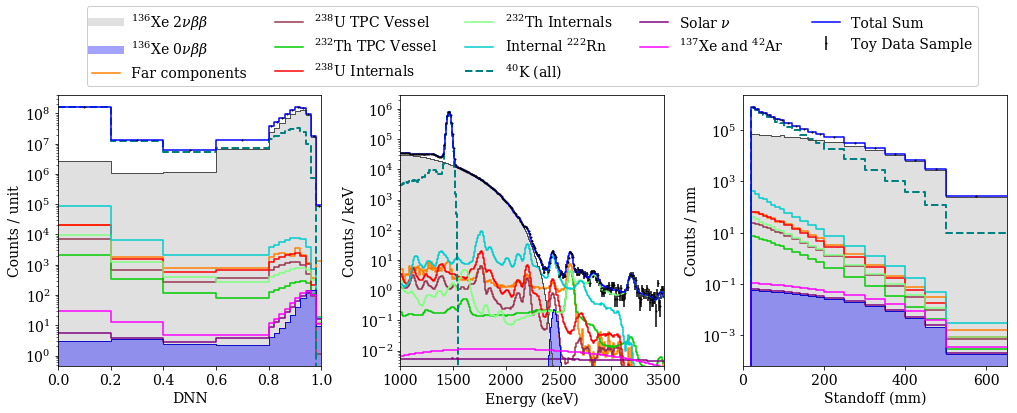

In [12]:
# Plot differential spectra

cut_dict = {'DNN': (0.,1.),
                    'Energy (keV)': (1000.,3500.),
                    'Standoff (mm)': (0., 650.)
                    }


plot_data=True
show_legend=True

plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots (1, 3, figsize=(17, 5), gridspec_kw={'wspace':0.3})


# Loop over pdfs and each to plot
for j in range(3):
    for i in range(len(likelihood2020.model.variable_list)):
        var = likelihood2020.model.variable_list[i]
        if 'Num' in var['Name']:

            weight = var['Value']
            cut_pdf = likelihood2020.model.GetSlicedDistribution( cut_dict, var_name=var['Name'], verbose=False )
            component_name = ''.join( var['Name'].split('_')[1:] )
            print('Plotting {}'.format(component_name))


            if i == 0:
             # Initialize the summed histograms      
             cut_sum = hl.hist( [np.array([0.]),np.array([0.]),np.array([0.])] , \
                               bins=cut_pdf.bins)
            #else:
            cut_sum += ( weight * cut_pdf )

            cut_pdf_single_axis = cut_pdf.project([j])
            bin_widths = (cut_pdf_single_axis.bins[0][1:] - cut_pdf_single_axis.bins[0][:-1])
            #print(cut_pdf_single_axis.bins)
            #print(bin_widths)
            new_cut_pdf_single_axis = hl.Hist(cut_pdf_single_axis.bins,\
                                              cut_pdf_single_axis.values/bin_widths,\
                                              )
            
            
            #print('Component name: {}'.format(component_name))
            if 'Bb2n' in component_name:
                hl.fill_between( ax[j], 0, (weight * new_cut_pdf_single_axis), \
                                label=labels_dict[component_name], color=(0.7,0.7,0.7), alpha=0.4 )
                hl.plot1d( ax[j], (weight * new_cut_pdf_single_axis), \
                          color=(0.3,0.3,0.3), linewidth=1 )
            elif 'Bb0n' in component_name:
                hl.fill_between( ax[j], 0, (weight * new_cut_pdf_single_axis), \
                                label=labels_dict[component_name], color=(0.1,0.1,1.0), alpha=0.4 )
                hl.plot1d( ax[j], (weight * new_cut_pdf_single_axis), \
                           color=(0.05,0.05,0.8), linewidth=1 )
            elif 'K40' in component_name:
                hl.plot1d( ax[j], (weight * new_cut_pdf_single_axis), \
                           color=(0,0.5,0.5), linewidth=2,linestyle='--', label=labels_dict[component_name], )
            else:
                hl.plot1d( ax[j], (weight * new_cut_pdf_single_axis), \
                          label=labels_dict[component_name], color=colors_dict[component_name] )
                
    cut_sum_single_axis = cut_sum.project([j])
    new_cut_pdf_single_axis = hl.Hist(cut_sum_single_axis.bins,\
                                              cut_sum_single_axis.values/bin_widths,\
                                              )
    hl.plot1d(ax[j],new_cut_pdf_single_axis,color='b',label='Total Sum')
                
    if plot_data:
        print('Plotting data...')
        cut_data = likelihood2020.GetSlicedDataset( cut_dict, verbose=True )

        cut_data_1d = cut_data.project([j])
        bin_centers = (cut_data_1d.bins[0][:-1]+cut_data_1d.bins[0][1:])/2.
        ax[j].errorbar(bin_centers,cut_data_1d.values/bin_widths,yerr=np.sqrt(cut_data_1d.values)/bin_widths,\
                                                  fmt='ok',markersize=1,label='Toy Data Sample')
                
    if j==1:
        ax[j].set_ylim(3.e-3,3.e6)
    ax[j].set_yscale('log')
    ax[j].set_xlim((cut_pdf.project([j])).bins[0][0],(cut_pdf.project([j])).bins[0][-1])
    ax[j].set_xlabel('{}'.format(likelihood2020.model.axis_names[j]))
    if 'DNN' in likelihood2020.model.axis_names[j]:
        unit = 'unit'
    else:
        unit = likelihood2020.model.axis_names[j].split('(')[1][:-1]
    ax[j].set_ylabel('Counts / {}'.format(unit))
    
ax[1].set_zorder(100)
if show_legend:
    ax[1].legend(ncol=5,facecolor=(1.,1.,1.),framealpha=1.,\
                 loc='upper center',fontsize=14,bbox_to_anchor=(0.5,1.35))
            
plt.savefig('all_three_event_distributions_projected_differential_K40_dashed.png',dpi=300,bbox_inches='tight')
    

Plotting Far
Plotting VesselU238
Plotting VesselTh232
Plotting InternalsU238
Plotting InternalsTh232
Plotting Rn222
Plotting FullTPCK40
Plotting B8nu
Plotting FullLXeBb2n
Plotting FullLXeBb0n
Plotting Xe137andAr42
Plotting Far
Plotting VesselU238
Plotting VesselTh232
Plotting InternalsU238
Plotting InternalsTh232
Plotting Rn222
Plotting FullTPCK40
Plotting B8nu
Plotting FullLXeBb2n
Plotting FullLXeBb0n
Plotting Xe137andAr42
Plotting Far
Plotting VesselU238
Plotting VesselTh232
Plotting InternalsU238
Plotting InternalsTh232
Plotting Rn222
Plotting FullTPCK40
Plotting B8nu
Plotting FullLXeBb2n
Plotting FullLXeBb0n
Plotting Xe137andAr42


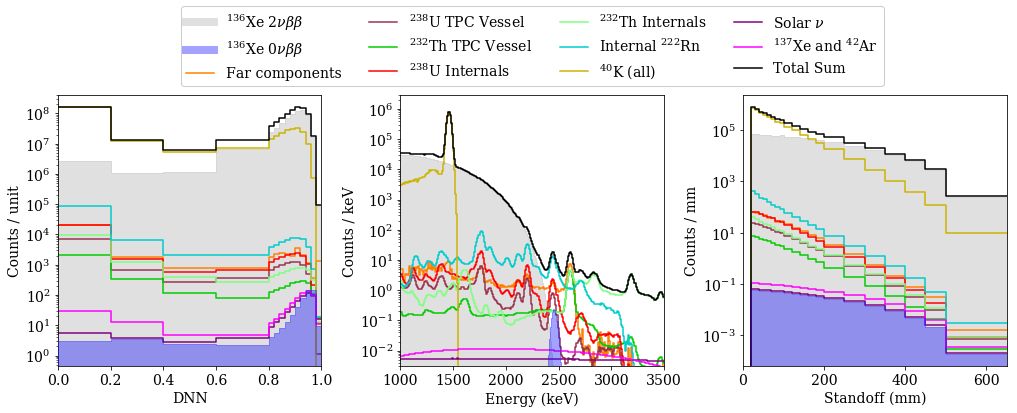

In [13]:
# Plot differential spectra

cut_dict = {'DNN': (0.,1.),
                    'Energy (keV)': (1000.,3500.),
                    'Standoff (mm)': (0., 650.)
                    }


plot_data=False
show_legend=True

plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots (1, 3, figsize=(17, 5), gridspec_kw={'wspace':0.3})


# Loop over pdfs and each to plot
for j in range(3):
    for i in range(len(likelihood2020.model.variable_list)):
        var = likelihood2020.model.variable_list[i]
        if 'Num' in var['Name']:

            weight = var['Value']
            cut_pdf = likelihood2020.model.GetSlicedDistribution( cut_dict, var_name=var['Name'], verbose=False )
            component_name = ''.join( var['Name'].split('_')[1:] )
            print('Plotting {}'.format(component_name))


            if i == 0:
             # Initialize the summed histograms      
             cut_sum = hl.hist( [np.array([0.]),np.array([0.]),np.array([0.])] , \
                               bins=cut_pdf.bins)
            #else:
            cut_sum += ( weight * cut_pdf )

            cut_pdf_single_axis = cut_pdf.project([j])
            bin_widths = (cut_pdf_single_axis.bins[0][1:] - cut_pdf_single_axis.bins[0][:-1])
            #print(cut_pdf_single_axis.bins)
            #print(bin_widths)
            new_cut_pdf_single_axis = hl.Hist(cut_pdf_single_axis.bins,\
                                              cut_pdf_single_axis.values/bin_widths,\
                                              )
            
            
            #print('Component name: {}'.format(component_name))
            if 'Bb2n' in component_name:
                hl.fill_between( ax[j], 0, (weight * new_cut_pdf_single_axis), \
                                label=labels_dict[component_name], color=(0.7,0.7,0.7), alpha=0.4 )
#                 hl.plot1d( ax[j], (weight * new_cut_pdf_single_axis), \
#                           color=(0.3,0.3,0.3), linewidth=1 )
            elif 'Bb0n' in component_name:
                hl.fill_between( ax[j], 0, (weight * new_cut_pdf_single_axis), \
                                label=labels_dict[component_name], color=(0.1,0.1,1.0), alpha=0.4, zorder=100 )
#                 hl.plot1d( ax[j], (weight * new_cut_pdf_single_axis), \
#                            color=(0.05,0.05,0.8), linewidth=1 )
            else:
                hl.plot1d( ax[j], (weight * new_cut_pdf_single_axis), \
                          label=labels_dict[component_name], color=colors_dict[component_name] )
                
    cut_sum_single_axis = cut_sum.project([j])
    new_cut_pdf_single_axis = hl.Hist(cut_sum_single_axis.bins,\
                                              cut_sum_single_axis.values/bin_widths,\
                                              )
    hl.plot1d(ax[j],new_cut_pdf_single_axis,color='k',label='Total Sum')
                
    if plot_data:
        print('Plotting data...')
        cut_data = likelihood2020.GetSlicedDataset( cut_dict, verbose=True )

        cut_data_1d = cut_data.project([j])
        bin_centers = (cut_data_1d.bins[0][:-1]+cut_data_1d.bins[0][1:])/2.
        ax[j].errorbar(bin_centers,cut_data_1d.values/bin_widths,yerr=np.sqrt(cut_data_1d.values)/bin_widths,\
                                                  fmt='ok',markersize=1,label='Toy Data Sample')
                
    if j==1:
        ax[j].set_ylim(3.e-3,3.e6)
    ax[j].set_yscale('log')
    ax[j].set_xlim((cut_pdf.project([j])).bins[0][0],(cut_pdf.project([j])).bins[0][-1])
    ax[j].set_xlabel('{}'.format(likelihood2020.model.axis_names[j]))
    if 'DNN' in likelihood2020.model.axis_names[j]:
        unit = 'unit'
    else:
        unit = likelihood2020.model.axis_names[j].split('(')[1][:-1]
    ax[j].set_ylabel('Counts / {}'.format(unit))
    
ax[1].set_zorder(100)
if show_legend:
    ax[1].legend(ncol=4,facecolor=(1.,1.,1.),framealpha=1.,\
                 loc='upper center',fontsize=14,bbox_to_anchor=(0.5,1.35))
            
plt.savefig('all_three_event_distributions_projected_differential_no_data.png',dpi=300,bbox_inches='tight')
            
            

# LIGO plot

In [66]:
likelihood2020 = nEXOFitLikelihood.nEXOFitLikelihood()
likelihood2020.AddPDFDataframeToModel(workspace2020_d024.df_group_pdfs,\
                                      axis_names=workspace2020_d024.histogram_axis_names)

sig_idx = likelihood2020.model.GetVariableIndexByName('Bb0n')
likelihood2020.model.variable_list[sig_idx]['Value'] = 11.81

likelihood2020.model.GenerateModelDistribution()


likelihood2020.AddDataset( likelihood2020.model.GenerateDataset() )

likelihood2020.PrintVariableList()

Variable name:          Value:       IsFixed:  FitError   InputError:   IsConstrained: Limits:      
Num_Far                 5.093e+03    False     None       71.36         False          (None,None)
Num_Vessel_U238         1.855e+03    False     None       43.07         False          (None,None)
Num_Vessel_Th232        577.6        False     None       24.03         False          (None,None)
Num_Internals_U238      4.913e+03    False     None       70.09         False          (None,None)
Num_Internals_Th232     2.458e+03    False     None       49.58         False          (None,None)
Num_Rn222               2.041e+04    False     None       142.9         False          (None,None)
Num_FullTPC_K40         4.064e+07    False     None       6.375e+03     False          (None,None)
Num_B8nu                12.93        False     None       3.596         False          (None,None)
Num_FullLXeBb2n         1.476e+07    False     None       3.841e+03     False          (None,None)
Num_Full

Plotting Far
Plotting VesselU238
Plotting VesselTh232
Plotting InternalsU238
Plotting InternalsTh232
Plotting Rn222
Plotting FullTPCK40
Plotting B8nu
Plotting FullLXeBb2n
Plotting FullLXeBb0n
Plotting Xe137andAr42
Plotting data...
DNN:
	Input cut boundaries:      0.85,      1.0
	Actual ROI boundaries:     0.84,      1.0
Energy (keV):
	Input cut boundaries:    2434.0,   2480.0
	Actual ROI boundaries:   2430.0,   2480.0
Standoff (mm):
	Input cut boundaries:       0.0,    650.0
	Actual ROI boundaries:      0.0,    650.0


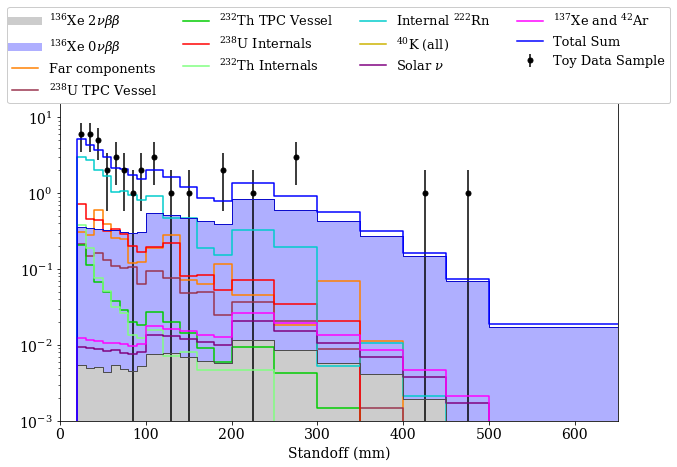

In [67]:
cut_dict = {'DNN': (0.85,1.),
                    'Energy (keV)': (2434.,2480.),
                    'Standoff (mm)': (0., 650.)
                    }

plot_data=True
show_legend=True

plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots (1, 1, figsize=(10, 6))

for i in range(len(likelihood2020.model.variable_list)):
    var = likelihood2020.model.variable_list[i]
    if 'Num' in var['Name']:

        weight = var['Value']
#         if 'Xe137' in var['Name']:
#             weight *= 1/0.3
        cut_pdf = likelihood2020.model.GetSlicedDistribution( cut_dict, var_name=var['Name'], verbose=False )
        component_name = ''.join( var['Name'].split('_')[1:] )
        print('Plotting {}'.format(component_name))

        cut_pdf_single_axis = cut_pdf.project([2])
        bin_widths = (cut_pdf_single_axis.bins[0][1:] - cut_pdf_single_axis.bins[0][:-1])
        new_cut_pdf_single_axis = hl.Hist(cut_pdf_single_axis.bins,\
                                              cut_pdf_single_axis.values/bin_widths,\
                                              )
        
        if i == 0:
         # Initialize the summed histograms      
         cut_sum = hl.hist( [np.array([0.]),np.array([0.]),np.array([0.])] , \
                           bins=cut_pdf.bins)
        #else:
        cut_sum += ( weight * cut_pdf )

        #print('Component name: {}'.format(component_name))
        if 'Bb2n' in component_name:
            hl.fill_between( ax, 0, (weight * cut_pdf).project([2]), \
                            label=labels_dict[component_name], color=(0.8,0.8,0.8), alpha=1.0, zorder=-1 )
            hl.plot1d( ax, (weight * cut_pdf).project([2]),\
                      color=(0.3,0.3,0.3), linewidth=1, zorder=51 )
        elif 'Bb0n' in component_name:
            hl.fill_between( ax, 0, (weight * cut_pdf).project([2]), \
                            label=labels_dict[component_name], color=(0.1,0.1,1.0), alpha=0.35, zorder=-2 )
            hl.plot1d( ax, (weight * cut_pdf).project([2]),\
                      color=(0.05,0.05,0.8),linewidth=1,zorder=49 )
        else:
            hl.plot1d( ax, (weight * cut_pdf).project([2]), \
                      label=labels_dict[component_name],color=colors_dict[component_name] )

hl.plot1d(ax,cut_sum.project([2]),color='b',label='Total Sum')

if plot_data:
    print('Plotting data...')
    cut_data = likelihood2020.GetSlicedDataset( cut_dict, verbose=True )

    cut_data_1d = cut_data.project([2])
    bin_centers = (cut_data_1d.bins[0][:-1]+cut_data_1d.bins[0][1:])/2.
    ax.errorbar(bin_centers,cut_data_1d.values,yerr=np.sqrt(cut_data_1d.values),\
                                              fmt='ok',markersize=5,label='Toy Data Sample')

ax.set_yscale('log')
ax.set_xlim((cut_pdf.project([2])).bins[0][0],(cut_pdf.project([2])).bins[0][-1])
ax.set_xlabel('{}'.format(likelihood2020.model.axis_names[2]))
ax.set_ylim([1.e-3,2.e1])
    
if show_legend:
    ax.legend(ncol=4,facecolor=(1.,1.,1.),framealpha=1.,\
                 loc='upper center',fontsize=13,bbox_to_anchor=(0.5,1.29))
            
plt.savefig('standoff_event_distributions_in_ROI.png',dpi=300,bbox_inches='tight')
            
            


Plotting Far
Plotting VesselU238
Plotting VesselTh232
Plotting InternalsU238
Plotting InternalsTh232
Plotting Rn222
Plotting FullTPCK40
Plotting B8nu
Plotting FullLXeBb2n
Plotting FullLXeBb0n
Plotting Xe137andAr42
Plotting data...
DNN:
	Input cut boundaries:      0.85,      1.0
	Actual ROI boundaries:     0.84,      1.0
Energy (keV):
	Input cut boundaries:    2434.0,   2480.0
	Actual ROI boundaries:   2430.0,   2480.0
Standoff (mm):
	Input cut boundaries:       0.0,    650.0
	Actual ROI boundaries:      0.0,    650.0


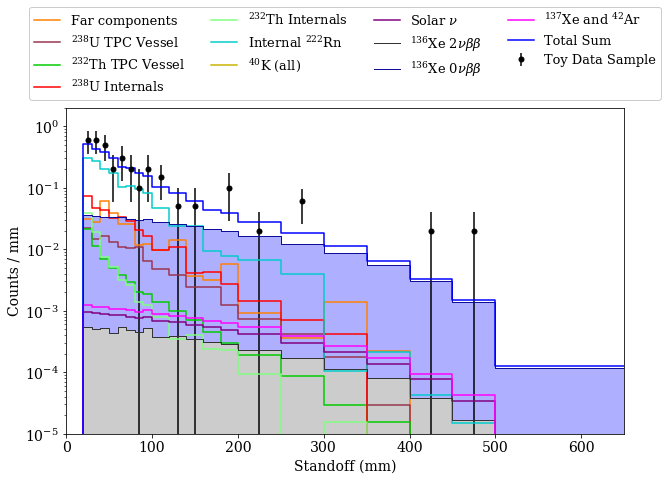

In [68]:
cut_dict = {'DNN': (0.85,1.),
                    'Energy (keV)': (2434.,2480.),
                    'Standoff (mm)': (0., 650.)
                    }



plot_data=True
show_legend=True

plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots (1, 1, figsize=(10, 6))

for i in range(len(likelihood2020.model.variable_list)):
    var = likelihood2020.model.variable_list[i]
    if 'Num' in var['Name']:

        weight = var['Value']
#         if 'Xe137' in var['Name']:
#             weight *= 1/0.3
        cut_pdf = likelihood2020.model.GetSlicedDistribution( cut_dict, var_name=var['Name'], verbose=False )
        component_name = ''.join( var['Name'].split('_')[1:] )
        print('Plotting {}'.format(component_name))

        cut_pdf_single_axis = cut_pdf.project([2])
        bin_widths = (cut_pdf_single_axis.bins[0][1:] - cut_pdf_single_axis.bins[0][:-1])
        new_cut_pdf_single_axis = hl.Hist(cut_pdf_single_axis.bins,\
                                              cut_pdf_single_axis.values/bin_widths,\
                                              )
        
        if i == 0:
            # Initialize the summed histograms      
            cut_sum = hl.hist( [np.array([0.]),np.array([0.]),np.array([0.])] , \
                           bins=cut_pdf.bins)
            internals_sum = hl.hist( [np.array([0.]),np.array([0.]),np.array([0.])] , \
                           bins=cut_pdf.bins)
            externals_sum = hl.hist( [np.array([0.]),np.array([0.]),np.array([0.])] , \
                           bins=cut_pdf.bins)
        #else:
        cut_sum += ( weight * cut_pdf )
        if 'External' in categories_dict[component_name]:
            externals_sum += ( weight * cut_pdf )
        elif 'Internal' in categories_dict[component_name]:
            internals_sum += ( weight * cut_pdf )
        

        #print('Component name: {}'.format(component_name))
        if 'Bb2n' in component_name:
            hl.fill_between( ax, 0, (weight * new_cut_pdf_single_axis), color=(0.8,0.8,0.8), alpha=1.0, zorder=-1 )
            hl.plot1d( ax, (weight * new_cut_pdf_single_axis),\
                      label=labels_dict[component_name], linewidth=1, color=(0.2,0.2,0.2), zorder=51 )
        elif 'Bb0n' in component_name:
            hl.fill_between( ax, 0, (weight * new_cut_pdf_single_axis), color=(0.1,0.1,1.0), alpha=0.35, zorder=-2 )
            hl.plot1d( ax, (weight * new_cut_pdf_single_axis),\
                      label=labels_dict[component_name], linewidth=1, color=(0.05,0.05,0.6),zorder=49 )
        else:
            hl.plot1d( ax, (weight * new_cut_pdf_single_axis),\
                      label=labels_dict[component_name], color=colors_dict[component_name] )
            
            
cut_sum_single_axis = cut_sum.project([2])
new_cut_sum_single_axis = hl.Hist(cut_sum_single_axis.bins,\
                                              cut_sum_single_axis.values/bin_widths,\
                                              )
hl.plot1d(ax,new_cut_sum_single_axis,color='b',label='Total Sum')

if plot_data:
    print('Plotting data...')
    cut_data = likelihood2020.GetSlicedDataset( cut_dict, verbose=True )

    cut_data_1d = cut_data.project([2])
    bin_centers = (cut_data_1d.bins[0][:-1]+cut_data_1d.bins[0][1:])/2.
    ax.errorbar(bin_centers,cut_data_1d.values/bin_widths,yerr=np.sqrt(cut_data_1d.values)/bin_widths,\
                                              fmt='ok',markersize=5,label='Toy Data Sample')

ax.set_yscale('log')
ax.set_xlim((cut_pdf.project([2])).bins[0][0],(cut_pdf.project([2])).bins[0][-1])
ax.set_xlabel('{}'.format(likelihood2020.model.axis_names[2]))
ax.set_ylim([1.e-5,2.e0])
ax.set_ylabel('Counts / mm')
    
if show_legend:
    ax.legend(ncol=4,facecolor=(1.,1.,1.),framealpha=1.,\
                 loc='upper center',fontsize=13,bbox_to_anchor=(0.5,1.33))
            
plt.savefig('standoff_event_distributions_in_ROI_differential.png',dpi=300,bbox_inches='tight')
            
            

Plotting Far
Plotting VesselU238
Plotting VesselTh232
Plotting InternalsU238
Plotting InternalsTh232
Plotting Rn222
Plotting FullTPCK40
Plotting B8nu
Plotting FullLXeBb2n
Plotting FullLXeBb0n
Plotting Xe137andAr42
Plotting data...
DNN:
	Input cut boundaries:      0.85,      1.0
	Actual ROI boundaries:     0.84,      1.0
Energy (keV):
	Input cut boundaries:    2434.0,   2480.0
	Actual ROI boundaries:   2430.0,   2480.0
Standoff (mm):
	Input cut boundaries:       0.0,    650.0
	Actual ROI boundaries:      0.0,    650.0
[array(401.23287503), array(278.33795418), array(201.35179404), array(104.33404691), array(36.27051823)]


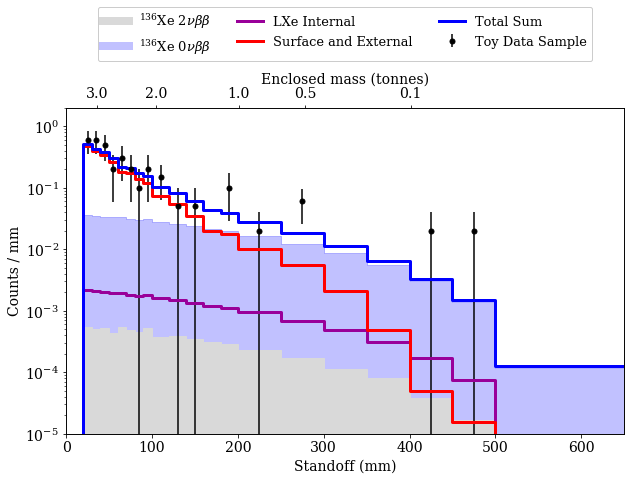

In [69]:
cut_dict = {'DNN': (0.85,1.),
                    'Energy (keV)': (2434.,2480.),
                    'Standoff (mm)': (0., 650.)
                    }



plot_data=True
show_legend=True

plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots (1, 1, figsize=(10, 6))

for i in range(len(likelihood2020.model.variable_list)):
    var = likelihood2020.model.variable_list[i]
    if 'Num' in var['Name']:

        weight = var['Value']
#         if 'Xe137' in var['Name']:
#             weight *= 1/0.3
        cut_pdf = likelihood2020.model.GetSlicedDistribution( cut_dict, var_name=var['Name'], verbose=False )
        component_name = ''.join( var['Name'].split('_')[1:] )
        print('Plotting {}'.format(component_name))

        cut_pdf_single_axis = cut_pdf.project([2])
        bin_widths = (cut_pdf_single_axis.bins[0][1:] - cut_pdf_single_axis.bins[0][:-1])
        new_cut_pdf_single_axis = hl.Hist(cut_pdf_single_axis.bins,\
                                              cut_pdf_single_axis.values/bin_widths,\
                                              )
        
        if i == 0:
            # Initialize the summed histograms      
            cut_sum = hl.hist( [np.array([0.]),np.array([0.]),np.array([0.])] , \
                           bins=cut_pdf.bins)
            internals_sum = hl.hist( [np.array([0.]),np.array([0.]),np.array([0.])] , \
                           bins=cut_pdf.bins)
            externals_sum = hl.hist( [np.array([0.]),np.array([0.]),np.array([0.])] , \
                           bins=cut_pdf.bins)
        #else:
        cut_sum += ( weight * cut_pdf )
        if 'External' in categories_dict[component_name]:
            externals_sum += ( weight * cut_pdf )
        elif 'Internal' in categories_dict[component_name]:
            internals_sum += ( weight * cut_pdf )
        

        #print('Component name: {}'.format(component_name))
        if 'Bb2n' in component_name:
            hl.fill_between( ax, 0, (weight * new_cut_pdf_single_axis), \
                            label=labels_dict[component_name], color=(0.85,0.85,0.85), alpha=1.0, zorder=-1 )
#             hl.plot1d( ax, (weight * new_cut_pdf_single_axis),\
#                       label=labels_dict[component_name], linewidth=1, color=(0.2,0.2,0.2), zorder=51 )
        elif 'Bb0n' in component_name:
            hl.fill_between( ax, 0, (weight * new_cut_pdf_single_axis), label=labels_dict[component_name], \
                            color=(0.2,0.2,1.0), alpha=0.3, zorder=-2 )
#             hl.plot1d( ax, (weight * new_cut_pdf_single_axis),\
#                       label=labels_dict[component_name], linewidth=1, color=(0.05,0.05,0.6),zorder=49 )
#        else:
#             hl.plot1d( ax, (weight * new_cut_pdf_single_axis),\
#                       label=labels_dict[component_name], color=colors_dict[component_name] )
            
    
internals_sum_single_axis = internals_sum.project([2])
new_internals_sum_single_axis = hl.Hist(internals_sum_single_axis.bins,\
                                              internals_sum_single_axis.values/bin_widths,\
                                              )
hl.plot1d(ax,new_internals_sum_single_axis,color=(0.6,0.,0.6),linewidth=3,\
          label='LXe Internal')

externals_sum_single_axis = externals_sum.project([2])
new_externals_sum_single_axis = hl.Hist(externals_sum_single_axis.bins,\
                                              externals_sum_single_axis.values/bin_widths,\
                                              )
hl.plot1d(ax,new_externals_sum_single_axis,color=(1.,0.,0.),linewidth=3,\
          label='Surface and External')

cut_sum_single_axis = cut_sum.project([2])
new_cut_sum_single_axis = hl.Hist(cut_sum_single_axis.bins,\
                                              cut_sum_single_axis.values/bin_widths,\
                                              )
hl.plot1d(ax,new_cut_sum_single_axis,color='b',label='Total Sum',linewidth=3)


if plot_data:
    print('Plotting data...')
    cut_data = likelihood2020.GetSlicedDataset( cut_dict, verbose=True )

    cut_data_1d = cut_data.project([2])
    bin_centers = (cut_data_1d.bins[0][:-1]+cut_data_1d.bins[0][1:])/2.
    ax.errorbar(bin_centers,cut_data_1d.values/bin_widths,yerr=np.sqrt(cut_data_1d.values)/bin_widths,\
                                              fmt='ok',markersize=5,label='Toy Data Sample')

ax.set_yscale('log')
ax.set_xlim((cut_pdf.project([2])).bins[0][0],(cut_pdf.project([2])).bins[0][-1])
ax.set_xlabel('{}'.format(likelihood2020.model.axis_names[2]))
ax.set_ylim([1.e-5,2.e0])
ax.set_ylabel('Counts / mm')
    
if show_legend:
    ax.legend(ncol=3,facecolor=(1.,1.,1.),framealpha=1.,\
                 loc='upper center',fontsize=13,bbox_to_anchor=(0.5,1.33))
    
ax   
ax2 = ax.twiny()

masses = [100, 500,1000,2000,3000]
masses_labels = ['{}'.format(mass/1000) for mass in masses]
fid_standoffs = [standoff_vs_mass(mass) for mass in masses]
print(fid_standoffs)
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(fid_standoffs)
ax2.set_xticklabels(masses_labels)
ax2.set_xlabel('Enclosed mass (tonnes)')
            
plt.savefig('standoff_event_distributions_in_ROI_differential_combined_bkgs.png',dpi=300,bbox_inches='tight')
            

Plotting Far
Plotting VesselU238
Plotting VesselTh232
Plotting InternalsU238
Plotting InternalsTh232
Plotting Rn222
Plotting FullTPCK40
Plotting B8nu
Plotting FullLXeBb2n
Plotting FullLXeBb0n
Plotting Xe137andAr42
Plotting data...
DNN:
	Input cut boundaries:      0.85,      1.0
	Actual ROI boundaries:     0.84,      1.0
Energy (keV):
	Input cut boundaries:    2434.0,   2480.0
	Actual ROI boundaries:   2430.0,   2480.0
Standoff (mm):
	Input cut boundaries:       0.0,    650.0
	Actual ROI boundaries:      0.0,    650.0


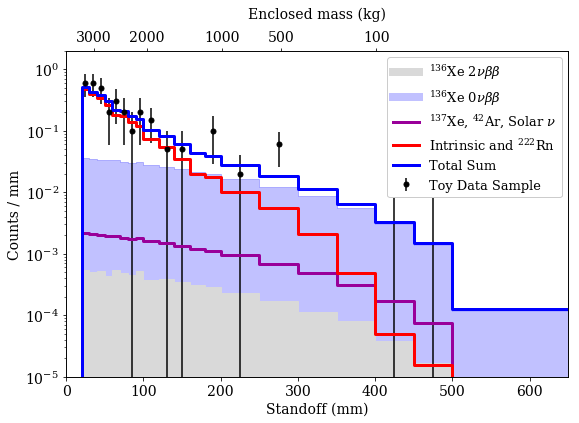

In [70]:
cut_dict = {'DNN': (0.85,1.),
                    'Energy (keV)': (2434.,2480.),
                    'Standoff (mm)': (0., 650.)
                    }



plot_data=True
show_legend=True

plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots (1, 1, figsize=(9, 6))

for i in range(len(likelihood2020.model.variable_list)):
    var = likelihood2020.model.variable_list[i]
    if 'Num' in var['Name']:

        weight = var['Value']
#         if 'Xe137' in var['Name']:
#             weight *= 1/0.3
        cut_pdf = likelihood2020.model.GetSlicedDistribution( cut_dict, var_name=var['Name'], verbose=False )
        component_name = ''.join( var['Name'].split('_')[1:] )
        print('Plotting {}'.format(component_name))

        cut_pdf_single_axis = cut_pdf.project([2])
        bin_widths = (cut_pdf_single_axis.bins[0][1:] - cut_pdf_single_axis.bins[0][:-1])
        new_cut_pdf_single_axis = hl.Hist(cut_pdf_single_axis.bins,\
                                              cut_pdf_single_axis.values/bin_widths,\
                                              )
        
        if i == 0:
            # Initialize the summed histograms      
            cut_sum = hl.hist( [np.array([0.]),np.array([0.]),np.array([0.])] , \
                           bins=cut_pdf.bins)
            internals_sum = hl.hist( [np.array([0.]),np.array([0.]),np.array([0.])] , \
                           bins=cut_pdf.bins)
            externals_sum = hl.hist( [np.array([0.]),np.array([0.]),np.array([0.])] , \
                           bins=cut_pdf.bins)
        #else:
        cut_sum += ( weight * cut_pdf )
        if 'External' in categories_dict[component_name]:
            externals_sum += ( weight * cut_pdf )
        elif 'Internal' in categories_dict[component_name]:
            internals_sum += ( weight * cut_pdf )
        

        #print('Component name: {}'.format(component_name))
        if 'Bb2n' in component_name:
            hl.fill_between( ax, 0, (weight * new_cut_pdf_single_axis), \
                            label=labels_dict[component_name], color=(0.85,0.85,0.85), alpha=1.0, zorder=-1 )
#             hl.plot1d( ax, (weight * new_cut_pdf_single_axis),\
#                       label=labels_dict[component_name], linewidth=1, color=(0.2,0.2,0.2), zorder=51 )
        elif 'Bb0n' in component_name:
            hl.fill_between( ax, 0, (weight * new_cut_pdf_single_axis), label=labels_dict[component_name], \
                            color=(0.2,0.2,1.0), alpha=0.3, zorder=-2 )
#             hl.plot1d( ax, (weight * new_cut_pdf_single_axis),\
#                       label=labels_dict[component_name], linewidth=1, color=(0.05,0.05,0.6),zorder=49 )
#        else:
#             hl.plot1d( ax, (weight * new_cut_pdf_single_axis),\
#                       label=labels_dict[component_name], color=colors_dict[component_name] )
            
    
internals_sum_single_axis = internals_sum.project([2])
new_internals_sum_single_axis = hl.Hist(internals_sum_single_axis.bins,\
                                              internals_sum_single_axis.values/bin_widths,\
                                              )
this_label='LXe Internal'
this_label='$^{137}$Xe, $^{42}$Ar, Solar $\\nu$'

hl.plot1d(ax,new_internals_sum_single_axis,color=(0.6,0.,0.6),linewidth=3,\
          label=this_label)

this_label='Surface and External'
this_label='Intrinsic and $^{222}$Rn'

externals_sum_single_axis = externals_sum.project([2])
new_externals_sum_single_axis = hl.Hist(externals_sum_single_axis.bins,\
                                              externals_sum_single_axis.values/bin_widths,\
                                              )
hl.plot1d(ax,new_externals_sum_single_axis,color=(1.,0.,0.),linewidth=3,\
          label=this_label)

cut_sum_single_axis = cut_sum.project([2])
new_cut_sum_single_axis = hl.Hist(cut_sum_single_axis.bins,\
                                              cut_sum_single_axis.values/bin_widths,\
                                              )
hl.plot1d(ax,new_cut_sum_single_axis,color='b',label='Total Sum',linewidth=3)


if plot_data:
    print('Plotting data...')
    cut_data = likelihood2020.GetSlicedDataset( cut_dict, verbose=True )

    cut_data_1d = cut_data.project([2])
    bin_centers = (cut_data_1d.bins[0][:-1]+cut_data_1d.bins[0][1:])/2.
    ax.errorbar(bin_centers,cut_data_1d.values/bin_widths,yerr=np.sqrt(cut_data_1d.values)/bin_widths,\
                                              fmt='ok',markersize=5,label='Toy Data Sample')

ax.set_yscale('log')
ax.set_xlim((cut_pdf.project([2])).bins[0][0],(cut_pdf.project([2])).bins[0][-1])
ax.set_xlabel('{}'.format(likelihood2020.model.axis_names[2]))
ax.set_ylim([1.e-5,2.e0])
ax.set_ylabel('Counts / mm')
    
if show_legend:
    ax.legend(ncol=1,facecolor=(1.,1.,1.),framealpha=1.,\
                 loc='upper right',fontsize=13)
    
ax   
ax2 = ax.twiny()

masses = [100, 500,1000,2000,3000]
masses_labels = ['{}'.format(mass) for mass in masses]
fid_standoffs = [standoff_vs_mass(mass) for mass in masses]
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(fid_standoffs)
ax2.set_xticklabels(masses_labels)
ax2.set_xlabel('Enclosed mass (kg)',labelpad=12)
            
plt.savefig('standoff_event_distributions_in_ROI_differential_combined_bkgs_legend_right.png',dpi=300,bbox_inches='tight')

Plotting Far
Plotting VesselU238
Plotting VesselTh232
Plotting InternalsU238
Plotting InternalsTh232
Plotting Rn222
Plotting FullTPCK40
Plotting B8nu
Plotting FullLXeBb2n
Plotting FullLXeBb0n
Plotting Xe137andAr42
Plotting data...
DNN:
	Input cut boundaries:       0.0,      1.0
	Actual ROI boundaries:      0.0,      1.0
Energy (keV):
	Input cut boundaries:    2434.0,   2480.0
	Actual ROI boundaries:   2430.0,   2480.0
Standoff (mm):
	Input cut boundaries:     104.0,    650.0
	Actual ROI boundaries:    100.0,    650.0


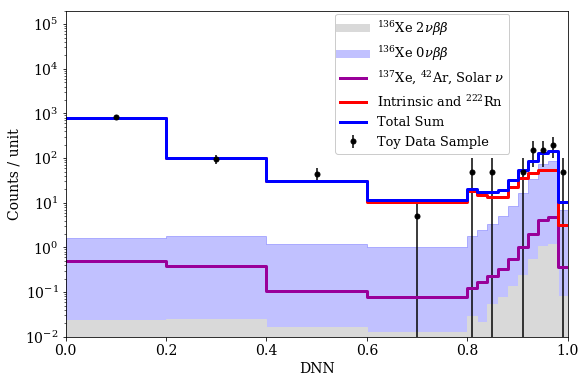

In [71]:
cut_dict = {'DNN': (0.,1.),
                    'Energy (keV)': (2434.,2480.),
                    'Standoff (mm)': (104., 650.)
                    }



plot_data=True
show_legend=True

plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots (1, 1, figsize=(9, 6))

for i in range(len(likelihood2020.model.variable_list)):
    var = likelihood2020.model.variable_list[i]
    if 'Num' in var['Name']:

        weight = var['Value']
#         if 'Xe137' in var['Name']:
#             weight *= 1/0.3
        cut_pdf = likelihood2020.model.GetSlicedDistribution( cut_dict, var_name=var['Name'], verbose=False )
        component_name = ''.join( var['Name'].split('_')[1:] )
        print('Plotting {}'.format(component_name))

        cut_pdf_single_axis = cut_pdf.project([0])
        bin_widths = (cut_pdf_single_axis.bins[0][1:] - cut_pdf_single_axis.bins[0][:-1])
        new_cut_pdf_single_axis = hl.Hist(cut_pdf_single_axis.bins,\
                                              cut_pdf_single_axis.values/bin_widths,\
                                              )
        
        if i == 0:
            # Initialize the summed histograms      
            cut_sum = hl.hist( [np.array([0.]),np.array([0.]),np.array([0.])] , \
                           bins=cut_pdf.bins)
            internals_sum = hl.hist( [np.array([0.]),np.array([0.]),np.array([0.])] , \
                           bins=cut_pdf.bins)
            externals_sum = hl.hist( [np.array([0.]),np.array([0.]),np.array([0.])] , \
                           bins=cut_pdf.bins)
        #else:
        cut_sum += ( weight * cut_pdf )
        if 'External' in categories_dict[component_name]:
            externals_sum += ( weight * cut_pdf )
        elif 'Internal' in categories_dict[component_name]:
            internals_sum += ( weight * cut_pdf )
        

        #print('Component name: {}'.format(component_name))
        if 'Bb2n' in component_name:
            hl.fill_between( ax, 0, (weight * new_cut_pdf_single_axis), \
                            label=labels_dict[component_name], color=(0.85,0.85,0.85), alpha=1.0, zorder=-1 )
#             hl.plot1d( ax, (weight * new_cut_pdf_single_axis),\
#                       label=labels_dict[component_name], linewidth=1, color=(0.2,0.2,0.2), zorder=51 )
        elif 'Bb0n' in component_name:
            hl.fill_between( ax, 0, (weight * new_cut_pdf_single_axis), label=labels_dict[component_name], \
                            color=(0.2,0.2,1.0), alpha=0.3, zorder=-2 )
#             hl.plot1d( ax, (weight * new_cut_pdf_single_axis),\
#                       label=labels_dict[component_name], linewidth=1, color=(0.05,0.05,0.6),zorder=49 )
#        else:
#             hl.plot1d( ax, (weight * new_cut_pdf_single_axis),\
#                       label=labels_dict[component_name], color=colors_dict[component_name] )
    
this_label='LXe Internal'
this_label='$^{137}$Xe, $^{42}$Ar, Solar $\\nu$'    
    
internals_sum_single_axis = internals_sum.project([0])
new_internals_sum_single_axis = hl.Hist(internals_sum_single_axis.bins,\
                                              internals_sum_single_axis.values/bin_widths,\
                                              )
hl.plot1d(ax,new_internals_sum_single_axis,color=(0.6,0.,0.6),linewidth=3,\
          label=this_label)

this_label='Surface and External'
this_label='Intrinsic and $^{222}$Rn'

externals_sum_single_axis = externals_sum.project([0])
new_externals_sum_single_axis = hl.Hist(externals_sum_single_axis.bins,\
                                              externals_sum_single_axis.values/bin_widths,\
                                              )
hl.plot1d(ax,new_externals_sum_single_axis,color=(1.,0.,0.),linewidth=3,\
          label=this_label)

cut_sum_single_axis = cut_sum.project([0])
new_cut_sum_single_axis = hl.Hist(cut_sum_single_axis.bins,\
                                              cut_sum_single_axis.values/bin_widths,\
                                              )
hl.plot1d(ax,new_cut_sum_single_axis,color='b',label='Total Sum',linewidth=3)


if plot_data:
    print('Plotting data...')
    cut_data = likelihood2020.GetSlicedDataset( cut_dict, verbose=True )

    cut_data_1d = cut_data.project([0])
    bin_centers = (cut_data_1d.bins[0][:-1]+cut_data_1d.bins[0][1:])/2.
    ax.errorbar(bin_centers,cut_data_1d.values/bin_widths,yerr=np.sqrt(cut_data_1d.values)/bin_widths,\
                                              fmt='ok',markersize=5,label='Toy Data Sample')

ax.set_yscale('log')
ax.set_xlim((cut_pdf.project([0])).bins[0][0],(cut_pdf.project([0])).bins[0][-1])
ax.set_xlabel('{}'.format(likelihood2020.model.axis_names[0]))
ax.set_ylim([1.e-2,2.e5])
ax.set_ylabel('Counts / unit')
    
if show_legend:
    ax.legend(ncol=1,facecolor=(1.,1.,1.),framealpha=1.,\
                 loc='upper center',fontsize=13,bbox_to_anchor=(0.71,1.01))
    
            
plt.savefig('dnn_event_distributions_in_ROI_differential_combined_bkgs_legend_right.png',dpi=300,bbox_inches='tight')





Plotting Far
Plotting VesselU238
Plotting VesselTh232
Plotting InternalsU238
Plotting InternalsTh232
Plotting Rn222
Plotting FullTPCK40
Plotting B8nu
Plotting FullLXeBb2n
Plotting FullLXeBb0n
Plotting Xe137andAr42
Plotting data...
DNN:
	Input cut boundaries:      0.86,      1.0
	Actual ROI boundaries:     0.86,      1.0
Energy (keV):
	Input cut boundaries:    2000.0,   3000.0
	Actual ROI boundaries:   2000.0,   3000.0
Standoff (mm):
	Input cut boundaries:     104.0,    650.0
	Actual ROI boundaries:    100.0,    650.0


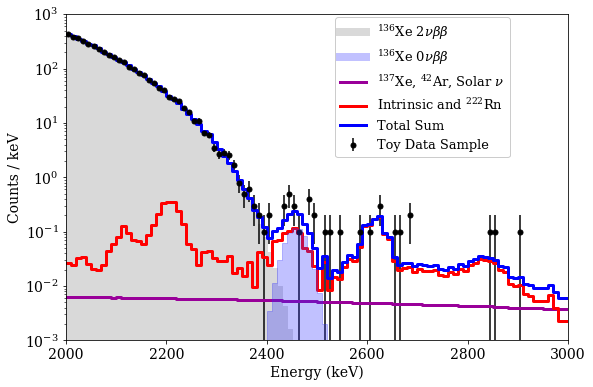

In [72]:
cut_dict = {'DNN': (0.86,1.),
                    'Energy (keV)': (2000.,3000.),
                    'Standoff (mm)': (104., 650.)
                    }



plot_data=True
show_legend=True

plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots (1, 1, figsize=(9, 6))

for i in range(len(likelihood2020.model.variable_list)):
    var = likelihood2020.model.variable_list[i]
    if 'Num' in var['Name']:

        weight = var['Value']
#         if 'Xe137' in var['Name']:
#             weight *= 1/0.3
        cut_pdf = likelihood2020.model.GetSlicedDistribution( cut_dict, var_name=var['Name'], verbose=False )
        component_name = ''.join( var['Name'].split('_')[1:] )
        print('Plotting {}'.format(component_name))

        cut_pdf_single_axis = cut_pdf.project([1])
        bin_widths = (cut_pdf_single_axis.bins[0][1:] - cut_pdf_single_axis.bins[0][:-1])
        new_cut_pdf_single_axis = hl.Hist(cut_pdf_single_axis.bins,\
                                              cut_pdf_single_axis.values/bin_widths,\
                                              )
        
        if i == 0:
            # Initialize the summed histograms      
            cut_sum = hl.hist( [np.array([0.]),np.array([0.]),np.array([0.])] , \
                           bins=cut_pdf.bins)
            internals_sum = hl.hist( [np.array([0.]),np.array([0.]),np.array([0.])] , \
                           bins=cut_pdf.bins)
            externals_sum = hl.hist( [np.array([0.]),np.array([0.]),np.array([0.])] , \
                           bins=cut_pdf.bins)
        #else:
        cut_sum += ( weight * cut_pdf )
        if 'External' in categories_dict[component_name]:
            externals_sum += ( weight * cut_pdf )
        elif 'Internal' in categories_dict[component_name]:
            internals_sum += ( weight * cut_pdf )
        

        #print('Component name: {}'.format(component_name))
        if 'Bb2n' in component_name:
            hl.fill_between( ax, 0, (weight * new_cut_pdf_single_axis), \
                            label=labels_dict[component_name], color=(0.85,0.85,0.85), alpha=1., zorder=-1 )
#             hl.plot1d( ax, (weight * new_cut_pdf_single_axis),\
#                       label=labels_dict[component_name], linewidth=1, color=(0.2,0.2,0.2), zorder=51 )
        elif 'Bb0n' in component_name:
            hl.fill_between( ax, 0, (weight * new_cut_pdf_single_axis), label=labels_dict[component_name], \
                            color=(0.2,0.2,1.0), alpha=0.3, zorder=100 )
#             hl.plot1d( ax, (weight * new_cut_pdf_single_axis),\
#                       label=labels_dict[component_name], linewidth=1, color=(0.05,0.05,0.6),zorder=49 )
#        else:
#             hl.plot1d( ax, (weight * new_cut_pdf_single_axis),\
#                       label=labels_dict[component_name], color=colors_dict[component_name] )
    
this_label='LXe Internal'
this_label='$^{137}$Xe, $^{42}$Ar, Solar $\\nu$'    
    
internals_sum_single_axis = internals_sum.project([1])
new_internals_sum_single_axis = hl.Hist(internals_sum_single_axis.bins,\
                                              internals_sum_single_axis.values/bin_widths,\
                                              )
hl.plot1d(ax,new_internals_sum_single_axis,color=(0.6,0.,0.6),linewidth=3,\
          label=this_label)

this_label='Surface and External'
this_label='Intrinsic and $^{222}$Rn'

externals_sum_single_axis = externals_sum.project([1])
new_externals_sum_single_axis = hl.Hist(externals_sum_single_axis.bins,\
                                              externals_sum_single_axis.values/bin_widths,\
                                              )
hl.plot1d(ax,new_externals_sum_single_axis,color=(1.,0.,0.),linewidth=3,\
          label=this_label)

cut_sum_single_axis = cut_sum.project([1])
new_cut_sum_single_axis = hl.Hist(cut_sum_single_axis.bins,\
                                              cut_sum_single_axis.values/bin_widths,\
                                              )
hl.plot1d(ax,new_cut_sum_single_axis,color='b',label='Total Sum',linewidth=3)


if plot_data:
    print('Plotting data...')
    cut_data = likelihood2020.GetSlicedDataset( cut_dict, verbose=True )

    cut_data_1d = cut_data.project([1])
    bin_centers = (cut_data_1d.bins[0][:-1]+cut_data_1d.bins[0][1:])/2.
    ax.errorbar(bin_centers,cut_data_1d.values/bin_widths,yerr=np.sqrt(cut_data_1d.values)/bin_widths,\
                                              fmt='ok',markersize=5,label='Toy Data Sample')

ax.set_yscale('log')
ax.set_xlim((cut_pdf.project([1])).bins[0][0],(cut_pdf.project([1])).bins[0][-1])
ax.set_xlabel('{}'.format(likelihood2020.model.axis_names[1]))
ax.set_ylim([1.e-3,1.e3])
ax.set_ylabel('Counts / keV')
    
if show_legend:
    ax.legend(ncol=1,facecolor=(1.,1.,1.),framealpha=1.,\
                 loc='upper center',fontsize=13,bbox_to_anchor=(0.71,1.01))
    
            
plt.savefig('energy_event_distributions_in_ROI_differential_combined_bkgs_legend_right.png',dpi=300,bbox_inches='tight')



Plotting Far
Plotting VesselU238
Plotting VesselTh232
Plotting InternalsU238
Plotting InternalsTh232
Plotting Rn222
Plotting FullTPCK40
Plotting B8nu
Plotting FullLXeBb2n
Plotting FullLXeBb0n
Plotting Xe137andAr42
Plotting data...
DNN:
	Input cut boundaries:       0.0,      1.0
	Actual ROI boundaries:      0.0,      1.0
Energy (keV):
	Input cut boundaries:    2434.0,   2480.0
	Actual ROI boundaries:   2430.0,   2480.0
Standoff (mm):
	Input cut boundaries:     104.0,    650.0
	Actual ROI boundaries:    100.0,    650.0
Plotting Far
Plotting VesselU238
Plotting VesselTh232
Plotting InternalsU238
Plotting InternalsTh232
Plotting Rn222
Plotting FullTPCK40
Plotting B8nu
Plotting FullLXeBb2n
Plotting FullLXeBb0n
Plotting Xe137andAr42
Plotting data...
DNN:
	Input cut boundaries:      0.86,      1.0
	Actual ROI boundaries:     0.86,      1.0
Energy (keV):
	Input cut boundaries:    2000.0,   2800.0
	Actual ROI boundaries:   2000.0,   2800.0
Standoff (mm):
	Input cut boundaries:     104.0,    650

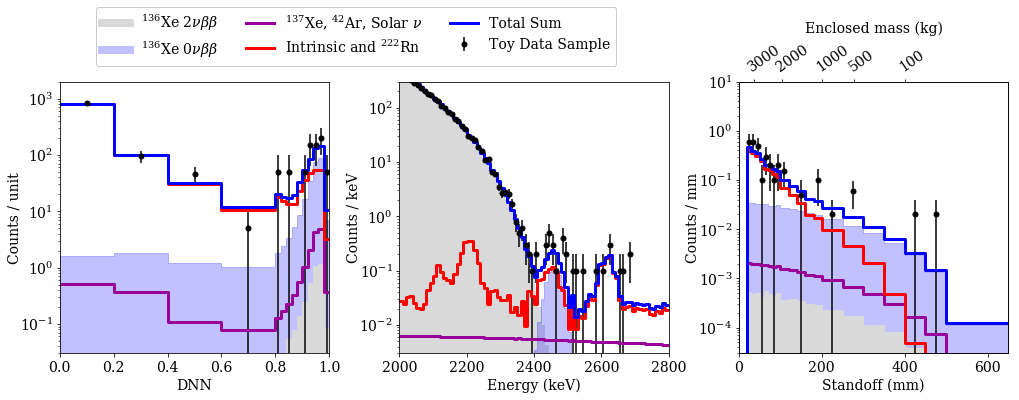

In [78]:
cut_dict_list = [{'DNN': (0.,1.),
                    'Energy (keV)': (2434.,2480.),
                    'Standoff (mm)': (104., 650.)
                    },\
                 {'DNN': (0.86,1.),
                    'Energy (keV)': (2000.,2800.),
                    'Standoff (mm)': (104., 650.)
                    },\
                 {'DNN': (0.86,1.),
                    'Energy (keV)': (2434.,2480.),
                    'Standoff (mm)': (0., 650.)
                    }]

ylim_list = [ [3.e-2,2.e3], [3.e-3,3.e2], [3.e-5,1.e1]]

units_list = ['unit','keV','mm']


plot_data=True
show_legend=True

plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots (1, 3, figsize=(17, 5), gridspec_kw={'wspace':0.26})








# Loop over axes and plot
for j in range(3):
    
    
    
    # Loop over components and create the summed pdfs
    for i in range(len(likelihood2020.model.variable_list)):
        var = likelihood2020.model.variable_list[i]
        if 'Num' in var['Name']:

            weight = var['Value']

            cut_pdf = likelihood2020.model.GetSlicedDistribution( cut_dict_list[j], var_name=var['Name'], verbose=False )
            component_name = ''.join( var['Name'].split('_')[1:] )
            print('Plotting {}'.format(component_name))

            cut_pdf_single_axis = cut_pdf.project([j])
            bin_widths = (cut_pdf_single_axis.bins[0][1:] - cut_pdf_single_axis.bins[0][:-1])
            new_cut_pdf_single_axis = hl.Hist(cut_pdf_single_axis.bins,\
                                                  cut_pdf_single_axis.values/bin_widths,\
                                                  )

            if i == 0:
                # Initialize the summed histograms      
                cut_sum = hl.hist( [np.array([0.]),np.array([0.]),np.array([0.])] , \
                               bins=cut_pdf.bins)
                internals_sum = hl.hist( [np.array([0.]),np.array([0.]),np.array([0.])] , \
                               bins=cut_pdf.bins)
                externals_sum = hl.hist( [np.array([0.]),np.array([0.]),np.array([0.])] , \
                               bins=cut_pdf.bins)
            #else:
            cut_sum += ( weight * cut_pdf )
            if 'External' in categories_dict[component_name]:
                externals_sum += ( weight * cut_pdf )
            elif 'Internal' in categories_dict[component_name]:
                internals_sum += ( weight * cut_pdf )

            #print('Component name: {}'.format(component_name))
            if j==1:
                if 'Bb2n' in component_name:
                    hl.fill_between( ax[j], 0, (weight * new_cut_pdf_single_axis), \
                                    label=labels_dict[component_name], color=(0.85,0.85,0.85), alpha=1., zorder=-2 )
                elif 'Bb0n' in component_name:
                    hl.fill_between( ax[j], 0, (weight * new_cut_pdf_single_axis), label=labels_dict[component_name], \
                                    color=(0.2,0.2,1.0), alpha=0.3, zorder=-1 )
            else:    
                if 'Bb2n' in component_name:
                    hl.fill_between( ax[j], 0, (weight * new_cut_pdf_single_axis), \
                                    label=labels_dict[component_name], color=(0.85,0.85,0.85), alpha=1., zorder=-1 )
                elif 'Bb0n' in component_name:
                    hl.fill_between( ax[j], 0, (weight * new_cut_pdf_single_axis), label=labels_dict[component_name], \
                                    color=(0.2,0.2,1.0), alpha=0.3, zorder=-2 )
    
    
   
    this_label='LXe Internal'
    this_label='$^{137}$Xe, $^{42}$Ar, Solar $\\nu$'    

    internals_sum_single_axis = internals_sum.project([j])
    new_internals_sum_single_axis = hl.Hist(internals_sum_single_axis.bins,\
                                                  internals_sum_single_axis.values/bin_widths,\
                                                  )
    hl.plot1d(ax[j],new_internals_sum_single_axis,color=(0.6,0.,0.6),linewidth=3,\
              label=this_label)

    this_label='Surface and External'
    this_label='Intrinsic and $^{222}$Rn'

    externals_sum_single_axis = externals_sum.project([j])
    new_externals_sum_single_axis = hl.Hist(externals_sum_single_axis.bins,\
                                                  externals_sum_single_axis.values/bin_widths,\
                                                  )
    hl.plot1d(ax[j],new_externals_sum_single_axis,color=(1.,0.,0.),linewidth=3,\
              label=this_label)

    cut_sum_single_axis = cut_sum.project([j])
    new_cut_sum_single_axis = hl.Hist(cut_sum_single_axis.bins,\
                                                  cut_sum_single_axis.values/bin_widths,\
                                                  )
    hl.plot1d(ax[j],new_cut_sum_single_axis,color='b',label='Total Sum',linewidth=3)


    if plot_data:
        print('Plotting data...')
        cut_data = likelihood2020.GetSlicedDataset( cut_dict_list[j], verbose=True )

        cut_data_1d = cut_data.project([j])
        bin_centers = (cut_data_1d.bins[0][:-1]+cut_data_1d.bins[0][1:])/2.
        ax[j].errorbar(bin_centers,cut_data_1d.values/bin_widths,yerr=np.sqrt(cut_data_1d.values)/bin_widths,\
                                                  fmt='ok',markersize=5,label='Toy Data Sample')

    ax[j].set_yscale('log')
    ax[j].set_xlim((cut_pdf.project([j])).bins[0][0],(cut_pdf.project([j])).bins[0][-1])
    ax[j].set_xlabel('{}'.format(likelihood2020.model.axis_names[j]))
    ax[j].set_ylabel('Counts / {}'.format(units_list[j]),labelpad=-1)
    #ax[j].yaxis.set_label_coords(-0.13,0.8)
    ax[j].tick_params(axis='y', which='major', pad=3)
    
    
    ax[j].set_ylim(ylim_list[j])
    
    
    # For the standoff plot, add the second x-axis
    if j==2:

        ax2 = ax[j].twiny()

        masses = [100, 500,1000,2000,3000]
        masses_labels = ['{}'.format(mass) for mass in masses]
        fid_standoffs = [standoff_vs_mass(mass) for mass in masses]
        ax2.set_xlim(ax[j].get_xlim())
        ax2.set_xticks(fid_standoffs)
        ax2.set_xticklabels(masses_labels)
        ax2.set_xlabel('Enclosed mass (kg)',labelpad=10)
        plt.setp(ax2.get_xticklabels(), rotation=35, ha="left",
         rotation_mode="anchor")
        
    if j==0:
        ax[j].legend(ncol=3,facecolor=(1.,1.,1.),framealpha=1.,\
                 loc='upper center',fontsize=14,bbox_to_anchor=(1.1,1.30))

        

plt.savefig('all_three_distributions_in_ROI_differential_combined_bkgs.png',dpi=300,bbox_inches='tight')


